In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/directional-forecasting-in-cryptocurrencies/sample_submission.csv
/kaggle/input/directional-forecasting-in-cryptocurrencies/train.csv
/kaggle/input/directional-forecasting-in-cryptocurrencies/test.csv


In [3]:
train=pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/train.csv')
test=pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/test.csv')
train

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00,58630.162800,144.0,54216.00,23325.927700,1.0
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00,44967.837600,99.0,52232.00,22484.030400,1.0
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00,91526.987200,177.0,108324.00,46673.061600,0.0
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00,56443.003800,107.0,32713.00,14097.148900,0.0


In [4]:
train.describe()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,1.589144e+09,4.971020e-01,4.976028e-01,4.965936e-01,4.971011e-01,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01
std,3.676171e+07,3.147919e-01,3.152553e-01,3.143317e-01,3.147945e-01,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01
min,1.525471e+09,1.057300e-01,1.068400e-01,1.012900e-01,1.058900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.557308e+09,2.676100e-01,2.678200e-01,2.673900e-01,2.676000e-01,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00
50%,1.589144e+09,3.629800e-01,3.633400e-01,3.626000e-01,3.629700e-01,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00
75%,1.620981e+09,6.572000e-01,6.579550e-01,6.563000e-01,6.572000e-01,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00
max,1.652817e+09,1.964710e+00,1.966890e+00,1.958350e+00,1.964710e+00,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00


In [5]:
test.describe()

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
count,909617.000000,9.096170e+05,909617.000000,909617.000000,909617.000000,909617.000000,9.096170e+05,9.096170e+05,909617.000000,9.096170e+05,9.096170e+05
mean,454808.000000,1.680106e+09,0.468089,0.468342,0.467828,0.468102,2.484656e+05,1.187006e+05,149.763820,1.239818e+05,5.920098e+04
std,262583.954242,1.575504e+07,0.104381,0.104434,0.104319,0.104384,4.606647e+05,2.494472e+05,364.157423,2.343786e+05,1.268206e+05
min,0.000000,1.652817e+09,0.288400,0.290600,0.287200,0.288400,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,227404.000000,1.666462e+09,0.379700,0.379900,0.379500,0.379700,7.538700e+04,3.355523e+04,53.000000,3.209500e+04,1.433058e+04
50%,454808.000000,1.680106e+09,0.466500,0.466800,0.466300,0.466600,1.472370e+05,6.706755e+04,88.000000,6.982900e+04,3.166280e+04
75%,682212.000000,1.693750e+09,0.521300,0.521500,0.521100,0.521300,2.748180e+05,1.285332e+05,151.000000,1.398770e+05,6.513958e+04
max,909616.000000,1.707394e+09,0.909000,0.938000,0.899000,0.909100,4.083906e+07,2.218319e+07,48569.000000,2.227382e+07,1.153613e+07


In [6]:
print(max(train['timestamp']))

1652817480


In [7]:
print(min(test['timestamp']))

1652817480


In [8]:
print(max(test['timestamp']))

1707394440


In [9]:
# Get the last entry of the 'target' column
first_entry = train['timestamp'].iloc[0]
first_entry

1525471260

In [10]:
# train['timestamp'] = train['timestamp'] - first_entry

In [11]:
# test['timestamp'] = test['timestamp'] - first_entry

In [12]:
train.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


In [13]:
test.head()

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,0,1652817480,0.4306,0.4308,0.4301,0.4301,101150.0,43542.2629,105.0,46109.0,19851.7237
1,1,1652817540,0.4301,0.4303,0.4293,0.4302,275647.0,118478.9689,228.0,91260.0,39217.6312
2,2,1652817600,0.4302,0.4302,0.4292,0.4299,134959.0,57979.2418,156.0,56685.0,24357.5448
3,3,1652817660,0.4299,0.4303,0.4299,0.4301,316209.0,135979.4040,121.0,161740.0,69552.2691
4,4,1652817720,0.4302,0.4307,0.4302,0.4303,107440.0,46243.7993,113.0,31096.0,13384.3384


In [14]:
# Get the number of unique values in each column
unique_counts = train.nunique()

# Print the column name and the count of unique values
for column, count in unique_counts.items():
    print(f"Column '{column}' has {count} unique values.")


Column 'timestamp' has 2122438 unique values.
Column 'open' has 98106 unique values.
Column 'high' has 95397 unique values.
Column 'low' has 95511 unique values.
Column 'close' has 97452 unique values.
Column 'volume' has 1488655 unique values.
Column 'quote_asset_volume' has 2117249 unique values.
Column 'number_of_trades' has 13360 unique values.
Column 'taker_buy_base_volume' has 1198193 unique values.
Column 'taker_buy_quote_volume' has 2097044 unique values.
Column 'target' has 2 unique values.


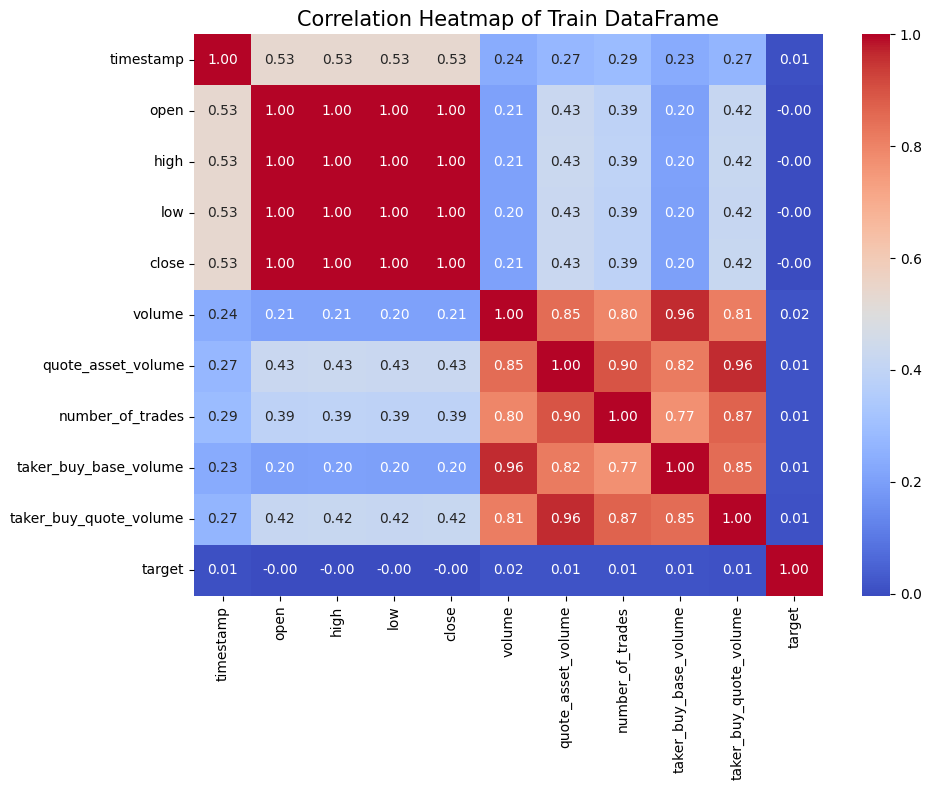

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix (only for numerical columns)
correlation_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title to the plot
plt.title('Correlation Heatmap of Train DataFrame', fontsize=15)

# Show the heatmap
plt.tight_layout()
plt.show()


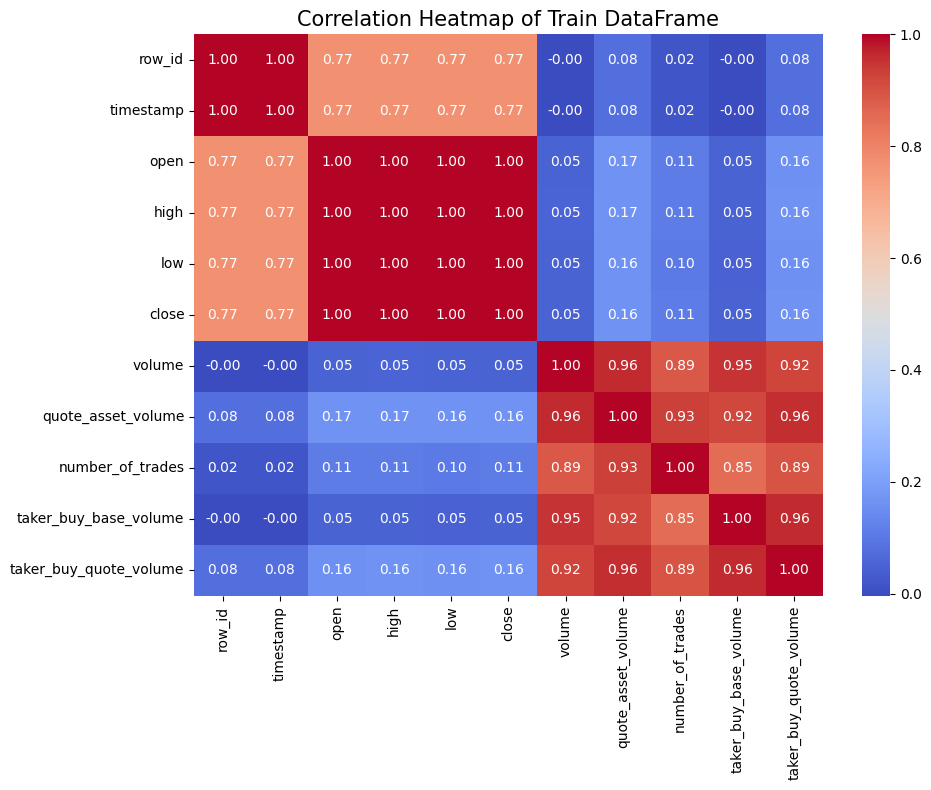

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix (only for numerical columns)
correlation_matrix = test.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title to the plot
plt.title('Correlation Heatmap of Train DataFrame', fontsize=15)

# Show the heatmap
plt.tight_layout()
plt.show()


In [17]:
# Find columns with 'inf' values
columns_with_inf = train.columns[np.isinf(train).any()]

print("Columns containing 'inf' values: ", columns_with_inf)

Columns containing 'inf' values:  Index([], dtype='object')


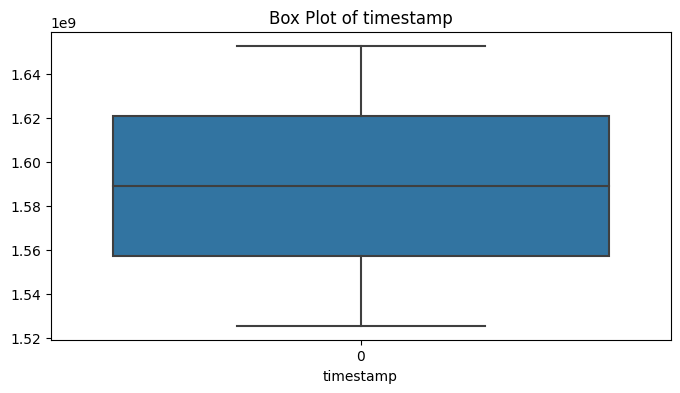

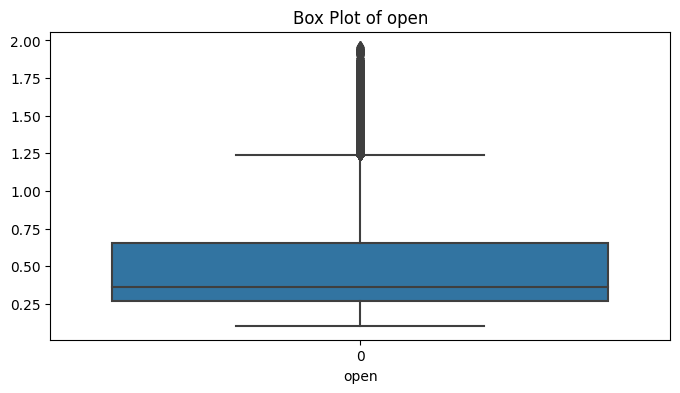

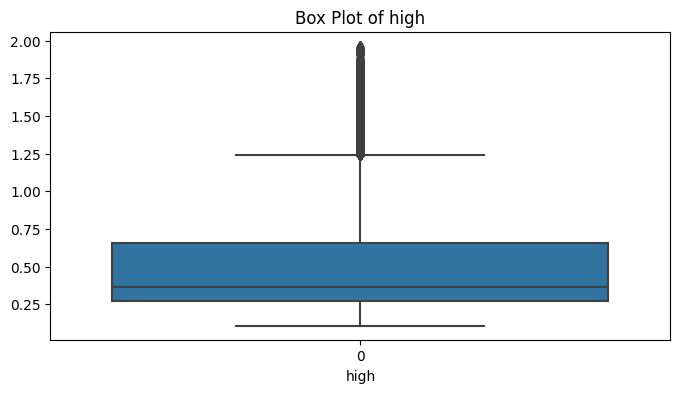

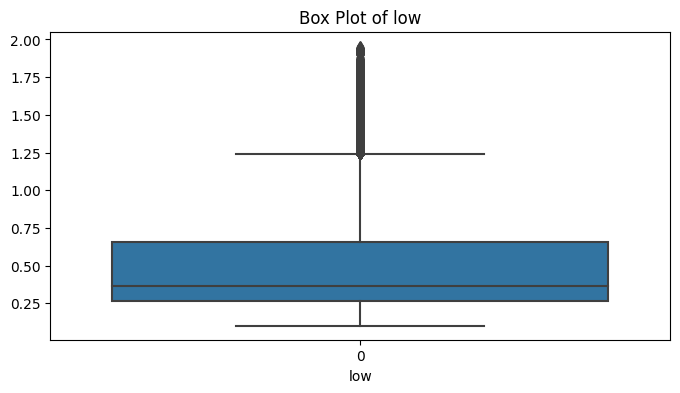

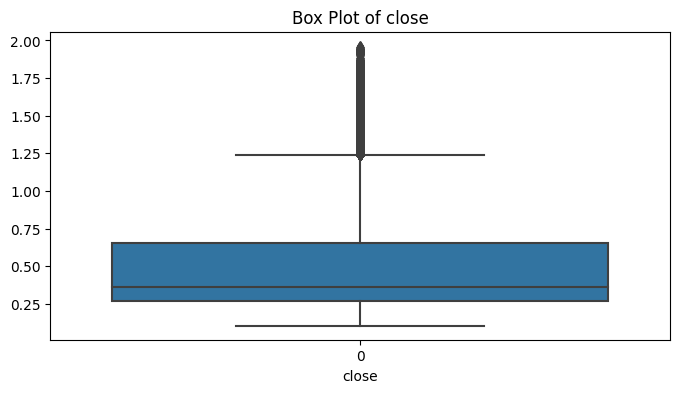

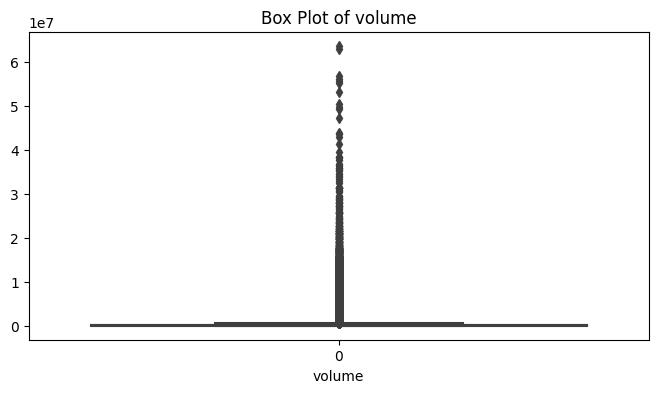

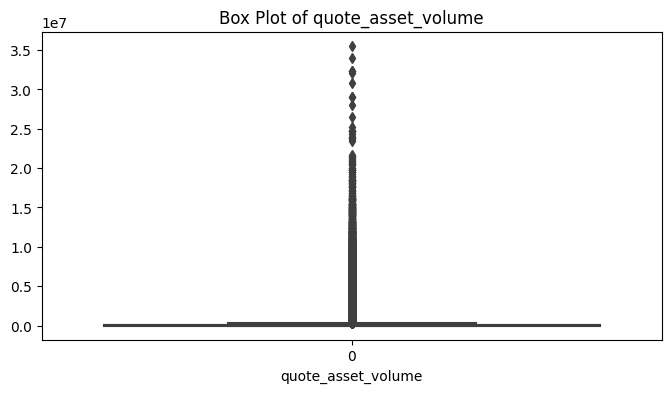

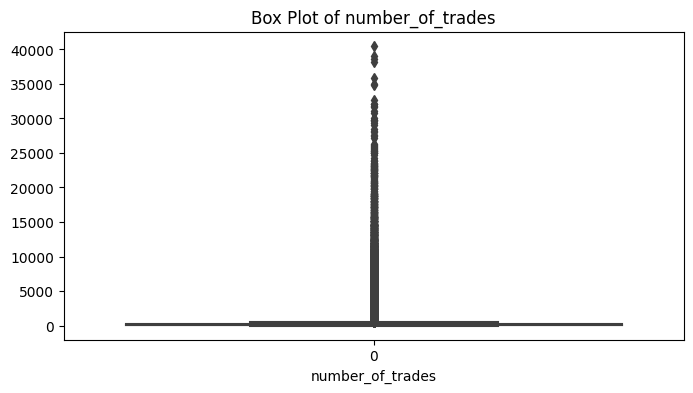

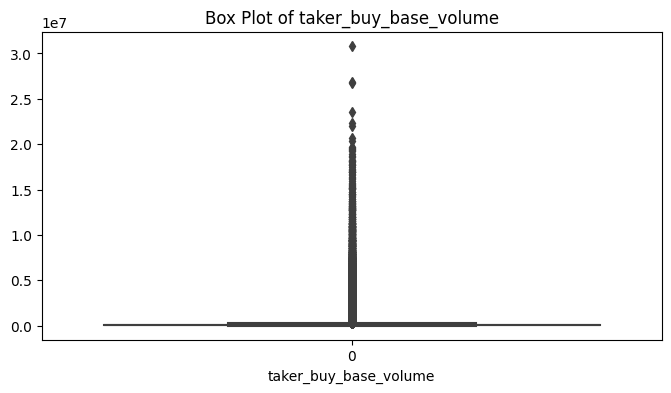

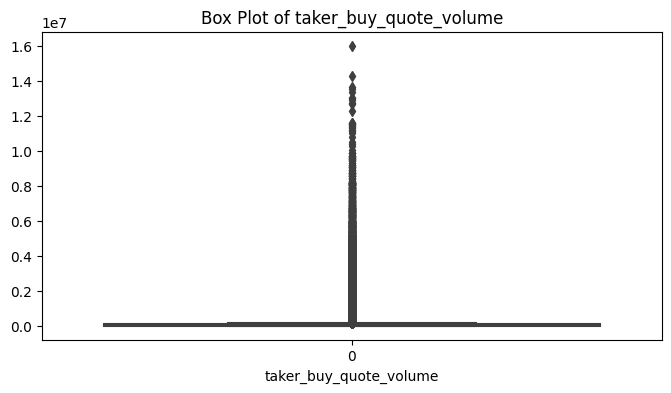

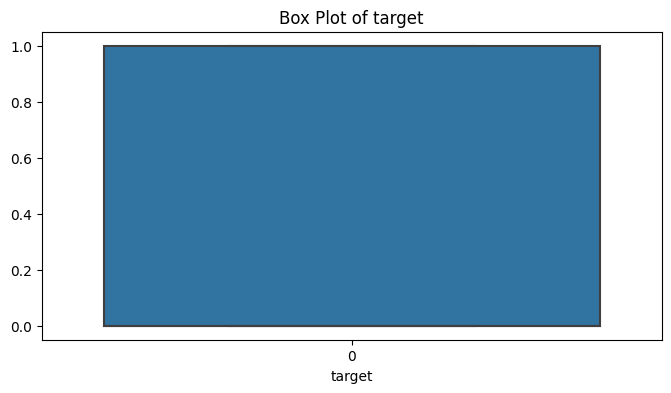

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create individual box plots for each column
for column in train.select_dtypes(include=['float64', 'int64']).columns:  # Adjust data types as necessary
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


In [19]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select the columns with perfect correlation (open, close, high, low)
columns_of_interest = ['open', 'close', 'high', 'low']
X = train[columns_of_interest].dropna()

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # You can start with 3 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each component
for i, variance in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {variance*100:.2f}% of variance explained')

# You can reduce dimensionality based on explained variance
# e.g., if the first component explains >95%, you can retain just the first component


Principal Component 1: 100.00% of variance explained
Principal Component 2: 0.00% of variance explained
Principal Component 3: 0.00% of variance explained


In [20]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select the columns with perfect correlation (open, close, high, low)
columns_of_interest = ['open', 'close', 'high', 'low']
X = test[columns_of_interest].dropna()

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # You can start with 3 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each component
for i, variance in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {variance*100:.2f}% of variance explained')

# You can reduce dimensionality based on explained variance
# e.g., if the first component explains >95%, you can retain just the first component


Principal Component 1: 100.00% of variance explained
Principal Component 2: 0.00% of variance explained
Principal Component 3: 0.00% of variance explained


In [21]:
train1=train.copy()
train1

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00,58630.162800,144.0,54216.00,23325.927700,1.0
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00,44967.837600,99.0,52232.00,22484.030400,1.0
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00,91526.987200,177.0,108324.00,46673.061600,0.0
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00,56443.003800,107.0,32713.00,14097.148900,0.0


In [22]:
test1=test.copy()
test1

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,0,1652817480,0.4306,0.4308,0.4301,0.4301,101150.0,43542.2629,105.0,46109.0,19851.7237
1,1,1652817540,0.4301,0.4303,0.4293,0.4302,275647.0,118478.9689,228.0,91260.0,39217.6312
2,2,1652817600,0.4302,0.4302,0.4292,0.4299,134959.0,57979.2418,156.0,56685.0,24357.5448
3,3,1652817660,0.4299,0.4303,0.4299,0.4301,316209.0,135979.4040,121.0,161740.0,69552.2691
4,4,1652817720,0.4302,0.4307,0.4302,0.4303,107440.0,46243.7993,113.0,31096.0,13384.3384
...,...,...,...,...,...,...,...,...,...,...,...
909612,909612,1707394200,0.5141,0.5144,0.5141,0.5143,115358.0,59321.7124,64.0,103183.0,53061.6505
909613,909613,1707394260,0.5144,0.5144,0.5142,0.5143,100017.0,51433.4744,59.0,29333.0,15084.3792
909614,909614,1707394320,0.5143,0.5144,0.5142,0.5142,51665.0,26573.9877,46.0,33916.0,17445.9911
909615,909615,1707394380,0.5143,0.5144,0.5143,0.5143,28063.0,14433.0717,35.0,16810.0,8645.6538


In [23]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming train1 and test1 are your training and test DataFrames

# Specify the columns with high correlation
columns_of_interest = ['open', 'close', 'high', 'low']

# Fit PCA on the training set
pca = PCA(n_components=1)  # We only need the first principal component
pca.fit(train1[columns_of_interest])

# Transform the training set
train1['pca_feature'] = pca.transform(train1[columns_of_interest])

# Transform the test set using the same PCA model
test1['pca_feature'] = pca.transform(test1[columns_of_interest])

# Optionally, drop the original columns from both sets
train1 = train1.drop(columns_of_interest, axis=1)
test1 = test1.drop(columns_of_interest, axis=1)

# Now both train1 and test1 contain the new 'pca_feature'
print(train1.head())
print(test1.head())


    timestamp   volume  quote_asset_volume  number_of_trades  \
0  1525471260   134.98          121.646459               4.0   
1  1525471320  1070.54          965.505313              12.0   
2  1525471380  2293.06         2066.963991               5.0   
3  1525471440  6850.59         6175.000909              19.0   
4  1525471500   832.30          750.222624               3.0   

   taker_buy_base_volume  taker_buy_quote_volume  target  pca_feature  
0                 125.08              112.723589     1.0     0.808299  
1                 879.94              793.612703     0.0     0.809599  
2                   0.00                0.000000     0.0     0.808589  
3                1786.30             1610.149485     0.0     0.808579  
4                 784.82              707.428900     0.0     0.808489  
   row_id   timestamp    volume  quote_asset_volume  number_of_trades  \
0       0  1652817480  101150.0          43542.2629             105.0   
1       1  1652817540  275647.0      

In [24]:
test1.describe()

,row_id,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,pca_feature
count,909617.000000,9.096170e+05,9.096170e+05,9.096170e+05,909617.000000,9.096170e+05,9.096170e+05,909617.000000
mean,454808.000000,1.680106e+09,2.484656e+05,1.187006e+05,149.763820,1.239818e+05,5.920098e+04,-0.058020
std,262583.954242,1.575504e+07,4.606647e+05,2.494472e+05,364.157423,2.343786e+05,1.268206e+05,0.208758
min,0.000000,1.652817e+09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-0.416098
25%,227404.000000,1.666462e+09,7.538700e+04,3.355523e+04,53.000000,3.209500e+04,1.433058e+04,-0.234850
50%,454808.000000,1.680106e+09,1.472370e+05,6.706755e+04,88.000000,6.982900e+04,3.166280e+04,-0.061100
75%,682212.000000,1.693750e+09,2.748180e+05,1.285332e+05,151.000000,1.398770e+05,6.513958e+04,0.048401
max,909616.000000,1.707394e+09,4.083906e+07,2.218319e+07,48569.000000,2.227382e+07,1.153613e+07,0.832528


In [25]:
train1.describe()

,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,pca_feature
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,1.589144e+09,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01,-7.477572e-17
std,3.676171e+07,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01,6.295854e-01
min,1.525471e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.841910e-01
25%,1.557308e+09,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00,-4.589900e-01
50%,1.589144e+09,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00,-2.682769e-01
75%,1.620981e+09,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00,3.201472e-01
max,1.652817e+09,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00,2.930554e+00


In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming train1 is your DataFrame
# Select the columns for PCA
pca_columns = ['volume', 'quote_asset_volume', 'number_of_trades', 
               'taker_buy_base_volume', 'taker_buy_quote_volume']

# Step 1: Extract the data for PCA
X = train1[pca_columns].dropna()  # Drop any rows with NaN values if necessary

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=5)  # Fit PCA without specifying n_components to get all components
pca_result = pca.fit_transform(X_scaled)

# Step 4: Get explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {variance*100:.2f}% of variance explained')


Principal Component 1: 88.71% of variance explained
Principal Component 2: 6.99% of variance explained
Principal Component 3: 2.99% of variance explained
Principal Component 4: 1.23% of variance explained
Principal Component 5: 0.10% of variance explained


In [27]:
import pandas as pd

# Assuming test1 is your DataFrame
# Calculate skewness for all numerical columns
skewness = train1.skew()

# Display skewness values
print("Skewness for all columns:")
print(skewness)


Skewness for all columns:
timestamp                 1.903010e-16
volume                    1.567609e+01
quote_asset_volume        1.210667e+01
number_of_trades          1.399714e+01
taker_buy_base_volume     1.434010e+01
taker_buy_quote_volume    1.167385e+01
target                    9.697417e-02
pca_feature               1.342879e+00
dtype: float64


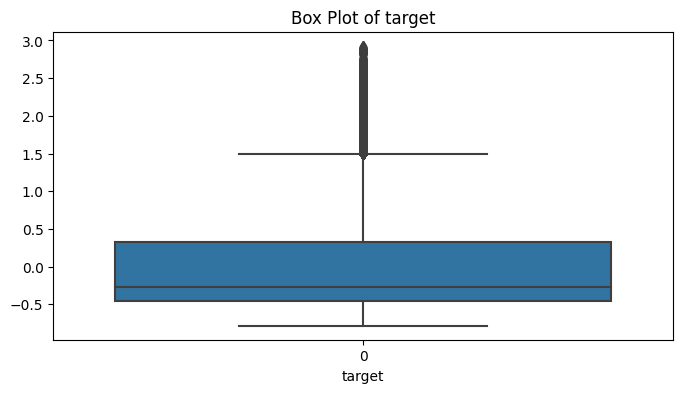

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create individual box plots for each column
# for column in train1.select_dtypes(include=['float64', 'int64']).columns:  # Adjust data types as necessary
plt.figure(figsize=(8, 4))
sns.boxplot(data=train1["pca_feature"])
plt.title(f'Box Plot of {column}')
plt.xlabel(column)
plt.show()


In [29]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import numpy as np

# Calculate original skewness
original_skewness = skew(train1['pca_feature'])

# Apply Yeo-Johnson Transformation
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_skewness = skew(yeo_johnson_transformer.fit_transform(train1[['pca_feature']]).flatten())

# Apply Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_skewness = skew(quantile_transformer.fit_transform(train1[['pca_feature']]).flatten())

# Apply Tanh Transformation
tanh_skewness = skew(np.tanh(train1['pca_feature']))

# Print the skewness values
print("Original Skewness:", original_skewness)
print("Yeo-Johnson Skewness:", yeo_johnson_skewness)
print("Quantile Skewness:", quantile_skewness)
print("Tanh Skewness:", tanh_skewness)


Original Skewness: 1.3428784508279767
Yeo-Johnson Skewness: 0.2665180329536202
Quantile Skewness: -0.011444540813833302
Tanh Skewness: 0.7747833481048898


In [30]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import numpy as np

# Calculate original skewness
original_skewness = skew(test1['pca_feature'])

# Apply Yeo-Johnson Transformation
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_skewness = skew(yeo_johnson_transformer.fit_transform(test1[['pca_feature']]).flatten())

# Apply Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_skewness = skew(quantile_transformer.fit_transform(test1[['pca_feature']]).flatten())

# Apply Tanh Transformation
tanh_skewness = skew(np.tanh(test1['pca_feature']))

# Print the skewness values
print("Original Skewness:", original_skewness)
print("Yeo-Johnson Skewness:", yeo_johnson_skewness)
print("Quantile Skewness:", quantile_skewness)
print("Tanh Skewness:", tanh_skewness)


Original Skewness: 0.6564978290008919
Yeo-Johnson Skewness: 0.10090863020782129
Quantile Skewness: -0.004632979073238106
Tanh Skewness: 0.6120500627152887


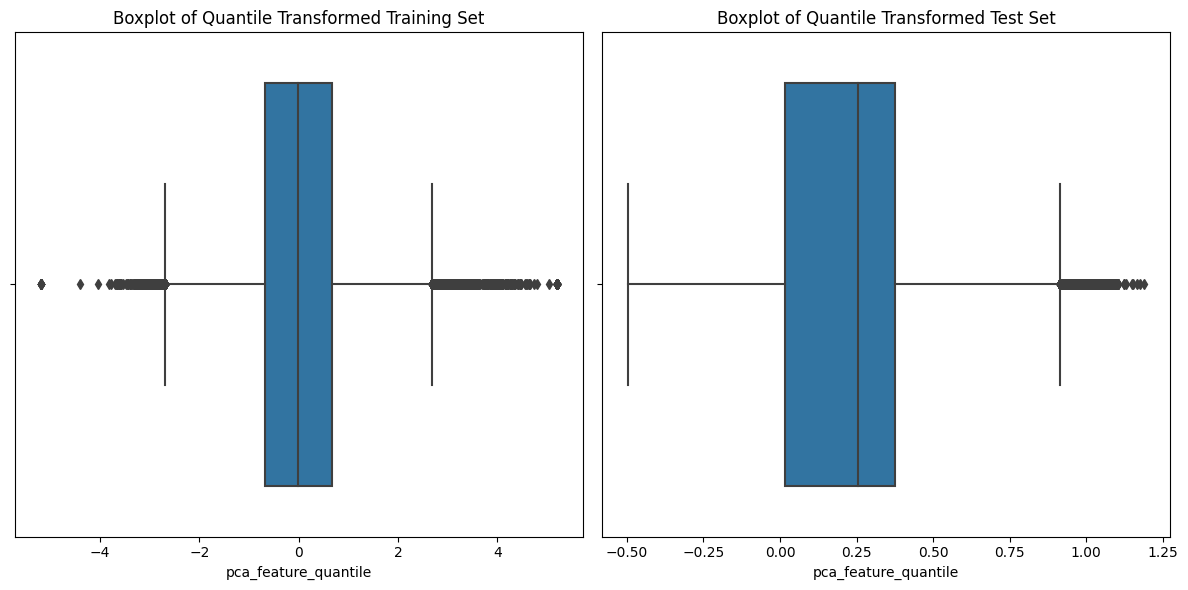

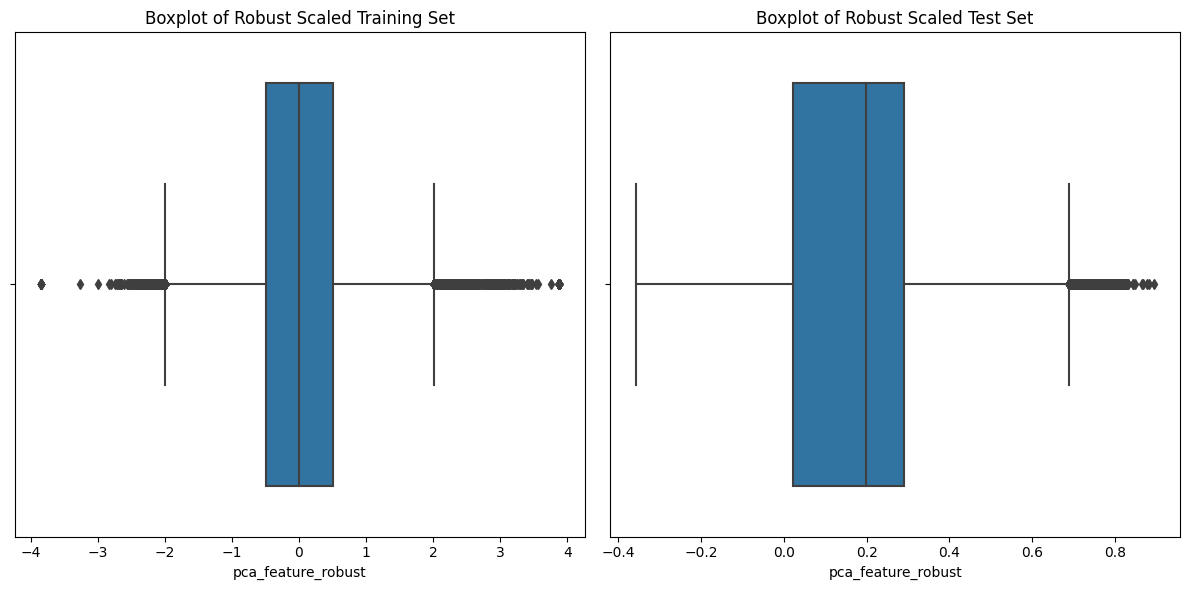

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, RobustScaler
import seaborn as sns

# Assuming train1 and test1 are your DataFrames
# Replace 'pca_feature' with the name of the feature you want to transform
feature_name = 'pca_feature'

# Step 1: Apply Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit and transform the training set
train1[feature_name + '_quantile'] = quantile_transformer.fit_transform(train1[[feature_name]])

# Transform the test set
test1[feature_name + '_quantile'] = quantile_transformer.transform(test1[[feature_name]])

# Step 2: Plot Boxplots for Quantile Transformed Features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=train1[feature_name + '_quantile'])
plt.title('Boxplot of Quantile Transformed Training Set')

plt.subplot(1, 2, 2)
sns.boxplot(x=test1[feature_name + '_quantile'])
plt.title('Boxplot of Quantile Transformed Test Set')

plt.tight_layout()
plt.show()

# Step 3: Apply Robust Scaling
robust_scaler = RobustScaler()

# Fit and transform the training set
train1[feature_name + '_robust'] = robust_scaler.fit_transform(train1[[feature_name + '_quantile']])

# Transform the test set
test1[feature_name + '_robust'] = robust_scaler.transform(test1[[feature_name + '_quantile']])

# Step 4: Plot Boxplots for Robust Scaled Features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=train1[feature_name + '_robust'])
plt.title('Boxplot of Robust Scaled Training Set')

plt.subplot(1, 2, 2)
sns.boxplot(x=test1[feature_name + '_robust'])
plt.title('Boxplot of Robust Scaled Test Set')

plt.tight_layout()
plt.show()


In [32]:
test1.describe()

,row_id,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,pca_feature,pca_feature_quantile,pca_feature_robust
count,909617.000000,9.096170e+05,9.096170e+05,9.096170e+05,909617.000000,9.096170e+05,9.096170e+05,909617.000000,909617.000000,909617.000000
mean,454808.000000,1.680106e+09,2.484656e+05,1.187006e+05,149.763820,1.239818e+05,5.920098e+04,-0.058020,0.231234,0.182865
std,262583.954242,1.575504e+07,4.606647e+05,2.494472e+05,364.157423,2.343786e+05,1.268206e+05,0.208758,0.251926,0.187098
min,0.000000,1.652817e+09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-0.416098,-0.495605,-0.356938
25%,227404.000000,1.666462e+09,7.538700e+04,3.355523e+04,53.000000,3.209500e+04,1.433058e+04,-0.234850,0.015080,0.022333
50%,454808.000000,1.680106e+09,1.472370e+05,6.706755e+04,88.000000,6.982900e+04,3.166280e+04,-0.061100,0.254032,0.199796
75%,682212.000000,1.693750e+09,2.748180e+05,1.285332e+05,151.000000,1.398770e+05,6.513958e+04,0.048401,0.374587,0.289329
max,909616.000000,1.707394e+09,4.083906e+07,2.218319e+07,48569.000000,2.227382e+07,1.153613e+07,0.832528,1.190354,0.895176


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

# Assuming train1 and test1 are your DataFrames
# Replace 'pca_feature' with the names of the features you want to transform
features_to_transform = ['volume','quote_asset_volume','number_of_trades','taker_buy_base_volume','taker_buy_quote_volume']  # Add more feature names as needed

# Dictionary to store skewness values
skewness_values = {
    'Feature': [],
    'Transformation': [],
    'Train Skewness': [],
    'Test Skewness': []
}

# Function to calculate skewness
def calculate_skewness(df):
    return df.apply(lambda x: x.skew()).to_dict()

# Original skewness
original_skewness_train = calculate_skewness(train1[features_to_transform])
original_skewness_test = calculate_skewness(test1[features_to_transform])

# Store original skewness
for feature in features_to_transform:
    skewness_values['Feature'].append(feature)
    skewness_values['Transformation'].append('Original')
    skewness_values['Train Skewness'].append(original_skewness_train[feature])
    skewness_values['Test Skewness'].append(original_skewness_test[feature])

# Transformations and their skewness
transformations = {
    'Log': lambda x: np.log1p(x),  # log1p handles zero values
    'Square Root': lambda x: np.sqrt(x),
    'Yeo-Johnson': PowerTransformer(method='yeo-johnson'),
    'Quantile': QuantileTransformer(output_distribution='normal')
}

# Apply transformations
for name, transform in transformations.items():
    if name in ['Log', 'Square Root']:
        # For Log and Square Root transformations, apply to each feature
        for feature in features_to_transform:
            train_transformed = transform(train1[feature])
            test_transformed = transform(test1[feature])
            
            # Calculate skewness after transformation
            skewness_after_train = pd.Series(train_transformed).skew()
            skewness_after_test = pd.Series(test_transformed).skew()
            
            # Store transformed skewness
            skewness_values['Feature'].append(feature)
            skewness_values['Transformation'].append(name)
            skewness_values['Train Skewness'].append(skewness_after_train)
            skewness_values['Test Skewness'].append(skewness_after_test)
    
    else:
        # For Yeo-Johnson and Quantile transformations, fit and transform
        transformer = transform
        train_transformed = transformer.fit_transform(train1[features_to_transform])
        test_transformed = transformer.transform(test1[features_to_transform])
        
        for i, feature in enumerate(features_to_transform):
            # Calculate skewness after transformation
            skewness_after_train = pd.Series(train_transformed[:, i]).skew()
            skewness_after_test = pd.Series(test_transformed[:, i]).skew()
            
            # Store transformed skewness
            skewness_values['Feature'].append(feature)
            skewness_values['Transformation'].append(name)
            skewness_values['Train Skewness'].append(skewness_after_train)
            skewness_values['Test Skewness'].append(skewness_after_test)

# Convert to DataFrame for better readability
skewness_df = pd.DataFrame(skewness_values)

# Display the results
print(skewness_df)


                   Feature Transformation  Train Skewness  Test Skewness
0                   volume       Original       15.676091      15.143184
1       quote_asset_volume       Original       12.106669      18.629924
2         number_of_trades       Original       13.997136      32.087284
3    taker_buy_base_volume       Original       14.340101      14.115019
4   taker_buy_quote_volume       Original       11.673850      17.847851
5                   volume            Log       -0.960083      -0.492118
6       quote_asset_volume            Log       -0.410390      -0.427502
7         number_of_trades            Log        0.205289       0.484181
8    taker_buy_base_volume            Log       -1.609305      -1.171003
9   taker_buy_quote_volume            Log       -0.904904      -1.064240
10                  volume    Square Root        2.764808       2.849907
11      quote_asset_volume    Square Root        2.893717       3.207871
12        number_of_trades    Square Root        2.

In [34]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Assuming train1 and test1 are your DataFrames
features_to_transform = [
    'volume',
    'quote_asset_volume',
    'number_of_trades',
    'taker_buy_base_volume',
    'taker_buy_quote_volume'
]

# Initialize the Yeo-Johnson transformer
transformer = PowerTransformer(method='yeo-johnson')

# Fit the transformer on the training data and transform both train and test sets
train_transformed = transformer.fit_transform(train1[features_to_transform])
test_transformed = transformer.transform(test1[features_to_transform])

# Create DataFrames for the transformed features
train_transformed_df = pd.DataFrame(train_transformed, columns=[f"{feature}_yeo_johnson" for feature in features_to_transform])
test_transformed_df = pd.DataFrame(test_transformed, columns=[f"{feature}_yeo_johnson" for feature in features_to_transform])

# Add the transformed features to the original DataFrames
train1 = pd.concat([train1, train_transformed_df], axis=1)
test1 = pd.concat([test1, test_transformed_df], axis=1)

# Display the first few rows of the updated DataFrames
print("Transformed Train DataFrame:")
print(train1.head())

print("\nTransformed Test DataFrame:")
print(test1.head())


Transformed Train DataFrame:
    timestamp   volume  quote_asset_volume  number_of_trades  \
0  1525471260   134.98          121.646459               4.0   
1  1525471320  1070.54          965.505313              12.0   
2  1525471380  2293.06         2066.963991               5.0   
3  1525471440  6850.59         6175.000909              19.0   
4  1525471500   832.30          750.222624               3.0   

   taker_buy_base_volume  taker_buy_quote_volume  target  pca_feature  \
0                 125.08              112.723589     1.0     0.808299   
1                 879.94              793.612703     0.0     0.809599   
2                   0.00                0.000000     0.0     0.808589   
3                1786.30             1610.149485     0.0     0.808579   
4                 784.82              707.428900     0.0     0.808489   

   pca_feature_quantile  pca_feature_robust  volume_yeo_johnson  \
0              1.177159            0.885377           -2.857260   
1            

In [35]:
train1.describe()

,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,pca_feature,pca_feature_quantile,pca_feature_robust,volume_yeo_johnson,quote_asset_volume_yeo_johnson,number_of_trades_yeo_johnson,taker_buy_base_volume_yeo_johnson,taker_buy_quote_volume_yeo_johnson
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,1.589144e+09,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01,-7.477572e-17,-5.475282e-03,7.067344e-03,-4.146410e-16,-9.048344e-16,-1.898719e-15,1.555533e-15,-1.469804e-16
std,3.676171e+07,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01,6.295854e-01,9.976768e-01,7.409469e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.525471e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.841910e-01,-5.199338e+00,-3.850270e+00,-4.095313e+00,-4.090649e+00,-3.466334e+00,-2.994258e+00,-2.958691e+00
25%,1.557308e+09,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00,-4.589900e-01,-6.779749e-01,-4.923794e-01,-6.847865e-01,-7.081193e-01,-7.070704e-01,-6.459792e-01,-6.666284e-01
50%,1.589144e+09,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00,-2.682769e-01,-1.499138e-02,-6.441686e-19,-3.926304e-02,-8.170615e-02,-3.748932e-02,-4.570173e-02,-7.294987e-02
75%,1.620981e+09,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00,3.201472e-01,6.685141e-01,5.076206e-01,6.499231e-01,7.139912e-01,7.070418e-01,6.319297e-01,6.809897e-01
max,1.652817e+09,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00,2.930554e+00,5.199338e+00,3.872538e+00,5.643042e+00,4.214484e+00,3.910614e+00,6.093902e+00,4.496548e+00


In [36]:
test1.describe()

,row_id,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,pca_feature,pca_feature_quantile,pca_feature_robust,volume_yeo_johnson,quote_asset_volume_yeo_johnson,number_of_trades_yeo_johnson,taker_buy_base_volume_yeo_johnson,taker_buy_quote_volume_yeo_johnson
count,909617.000000,9.096170e+05,9.096170e+05,9.096170e+05,909617.000000,9.096170e+05,9.096170e+05,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000
mean,454808.000000,1.680106e+09,2.484656e+05,1.187006e+05,149.763820,1.239818e+05,5.920098e+04,-0.058020,0.231234,0.182865,0.348362,0.342033,0.167287,0.303453,0.293239
std,262583.954242,1.575504e+07,4.606647e+05,2.494472e+05,364.157423,2.343786e+05,1.268206e+05,0.208758,0.251926,0.187098,0.689010,0.586023,0.613768,0.754959,0.653305
min,0.000000,1.652817e+09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-0.416098,-0.495605,-0.356938,-4.095313,-4.090649,-3.466334,-2.994258,-2.958691
25%,227404.000000,1.666462e+09,7.538700e+04,3.355523e+04,53.000000,3.209500e+04,1.433058e+04,-0.234850,0.015080,0.022333,-0.062124,-0.000174,-0.216431,-0.110631,-0.049661
50%,454808.000000,1.680106e+09,1.472370e+05,6.706755e+04,88.000000,6.982900e+04,3.166280e+04,-0.061100,0.254032,0.199796,0.349833,0.355608,0.145965,0.326866,0.327998
75%,682212.000000,1.693750e+09,2.748180e+05,1.285332e+05,151.000000,1.398770e+05,6.513958e+04,0.048401,0.374587,0.289329,0.759291,0.701332,0.524058,0.761049,0.696730
max,909616.000000,1.707394e+09,4.083906e+07,2.218319e+07,48569.000000,2.227382e+07,1.153613e+07,0.832528,1.190354,0.895176,5.139027,3.879721,4.004911,5.642227,4.211012


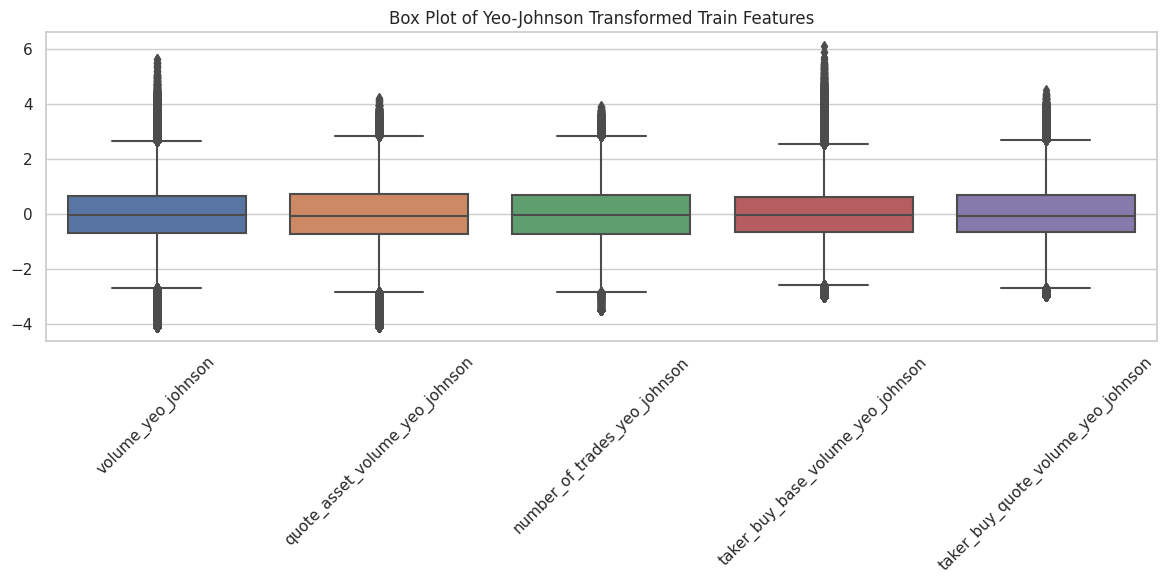

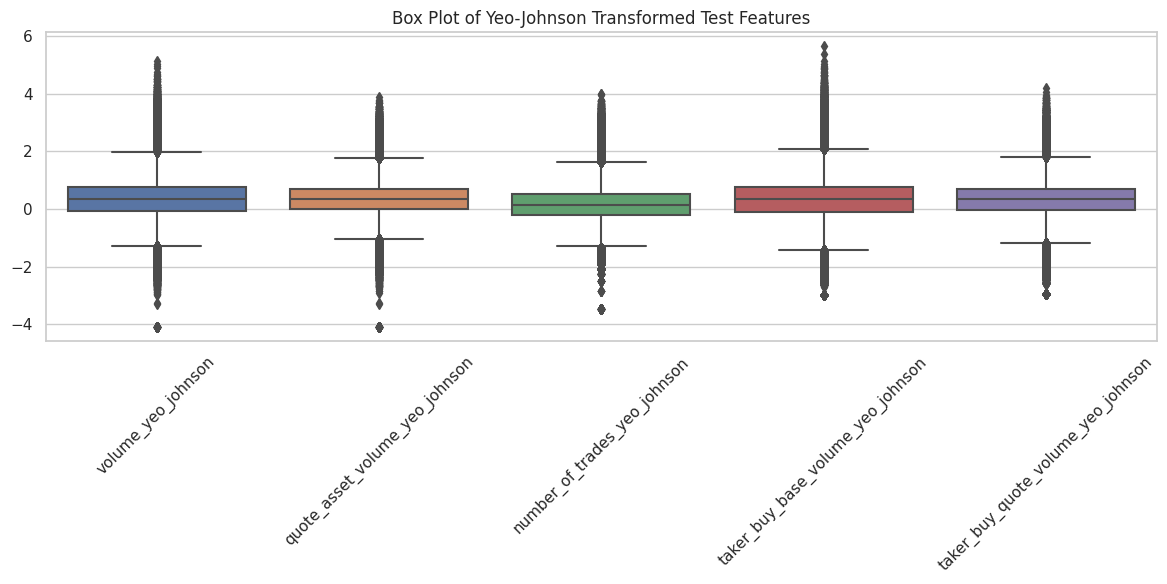

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Define a function to plot box plots for a given DataFrame
def plot_boxplots(data, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot box plots for transformed training data
plot_boxplots(train_transformed_df, 'Box Plot of Yeo-Johnson Transformed Train Features')

# Plot box plots for transformed test data
plot_boxplots(test_transformed_df, 'Box Plot of Yeo-Johnson Transformed Test Features')


In [38]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit the scaler on the Yeo-Johnson transformed training data and transform both train and test sets
train_scaled = robust_scaler.fit_transform(train_transformed_df)
test_scaled = robust_scaler.transform(test_transformed_df)

# Create DataFrames for the scaled features
train_scaled_df = pd.DataFrame(train_scaled, columns=[f"{feature}_scaled" for feature in features_to_transform])
test_scaled_df = pd.DataFrame(test_scaled, columns=[f"{feature}_scaled" for feature in features_to_transform])

# Add the scaled features to the original DataFrames
train1 = pd.concat([train1, train_scaled_df], axis=1)
test1 = pd.concat([test1, test_scaled_df], axis=1)

# Display the first few rows of the updated DataFrames
print("Scaled Train DataFrame:")
print(train1.head())

print("\nScaled Test DataFrame:")
print(test1.head())


Scaled Train DataFrame:
    timestamp   volume  quote_asset_volume  number_of_trades  \
0  1525471260   134.98          121.646459               4.0   
1  1525471320  1070.54          965.505313              12.0   
2  1525471380  2293.06         2066.963991               5.0   
3  1525471440  6850.59         6175.000909              19.0   
4  1525471500   832.30          750.222624               3.0   

   taker_buy_base_volume  taker_buy_quote_volume  target  pca_feature  \
0                 125.08              112.723589     1.0     0.808299   
1                 879.94              793.612703     0.0     0.809599   
2                   0.00                0.000000     0.0     0.808589   
3                1786.30             1610.149485     0.0     0.808579   
4                 784.82              707.428900     0.0     0.808489   

   pca_feature_quantile  pca_feature_robust  volume_yeo_johnson  \
0              1.177159            0.885377           -2.857260   
1              1.1

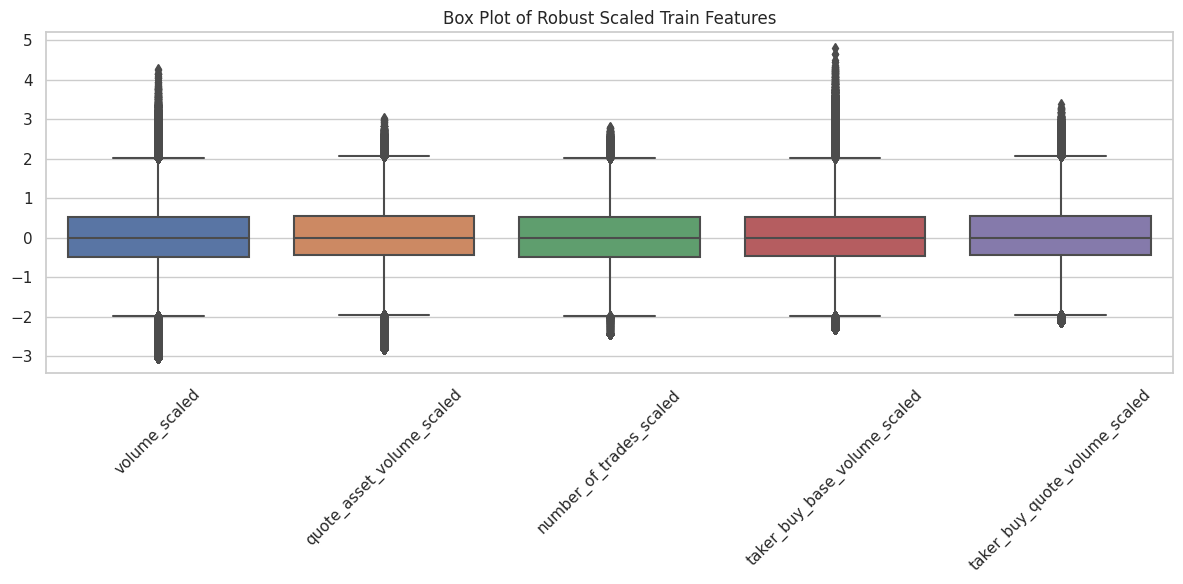

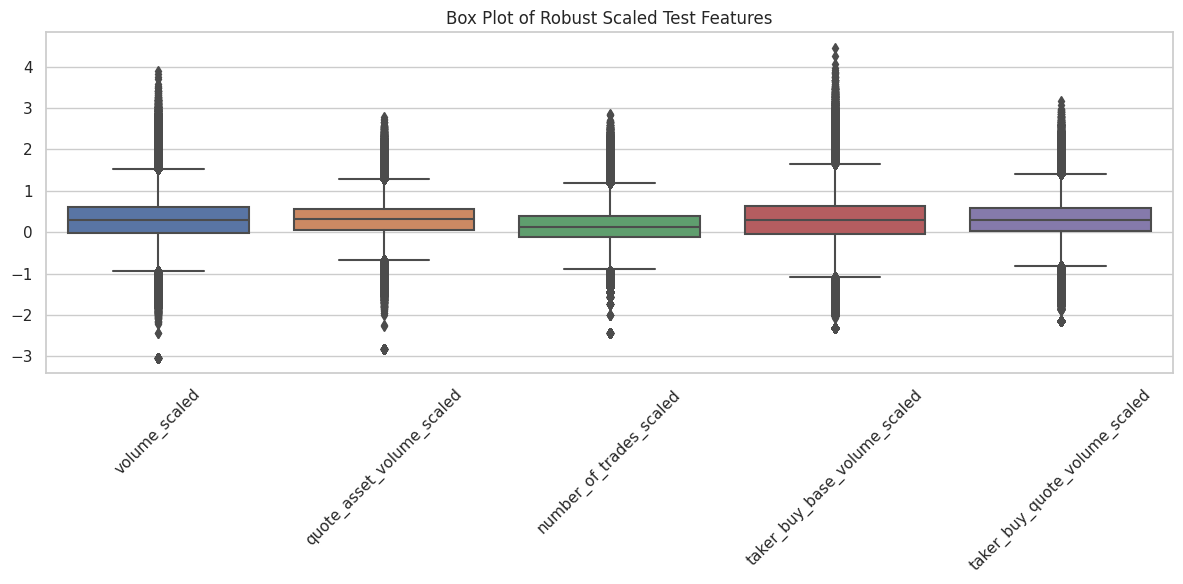

In [39]:
# Plot box plots for scaled training data
plot_boxplots(train_scaled_df, 'Box Plot of Robust Scaled Train Features')

# Plot box plots for scaled test data
plot_boxplots(test_scaled_df, 'Box Plot of Robust Scaled Test Features')


In [40]:
test1.describe()

,row_id,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,pca_feature,pca_feature_quantile,pca_feature_robust,volume_yeo_johnson,quote_asset_volume_yeo_johnson,number_of_trades_yeo_johnson,taker_buy_base_volume_yeo_johnson,taker_buy_quote_volume_yeo_johnson,volume_scaled,quote_asset_volume_scaled,number_of_trades_scaled,taker_buy_base_volume_scaled,taker_buy_quote_volume_scaled
count,909617.000000,9.096170e+05,9.096170e+05,9.096170e+05,909617.000000,9.096170e+05,9.096170e+05,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000
mean,454808.000000,1.680106e+09,2.484656e+05,1.187006e+05,149.763820,1.239818e+05,5.920098e+04,-0.058020,0.231234,0.182865,0.348362,0.342033,0.167287,0.303453,0.293239,0.290419,0.297965,0.144809,0.273224,0.271730
std,262583.954242,1.575504e+07,4.606647e+05,2.494472e+05,364.157423,2.343786e+05,1.268206e+05,0.208758,0.251926,0.187098,0.689010,0.586023,0.613768,0.754959,0.653305,0.516224,0.412080,0.434030,0.590777,0.484785
min,0.000000,1.652817e+09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-0.416098,-0.495605,-0.356938,-4.095313,-4.090649,-3.466334,-2.994258,-2.958691,-3.038901,-2.819009,-2.424733,-2.307329,-2.141365
25%,227404.000000,1.666462e+09,7.538700e+04,3.355523e+04,53.000000,3.209500e+04,1.433058e+04,-0.234850,0.015080,0.022333,-0.062124,-0.000174,-0.216431,-0.110631,-0.049661,-0.017128,0.057332,-0.126540,-0.050809,0.017281
50%,454808.000000,1.680106e+09,1.472370e+05,6.706755e+04,88.000000,6.982900e+04,3.166280e+04,-0.061100,0.254032,0.199796,0.349833,0.355608,0.145965,0.326866,0.327998,0.291521,0.307511,0.129731,0.291545,0.297523
75%,682212.000000,1.693750e+09,2.748180e+05,1.285332e+05,151.000000,1.398770e+05,6.513958e+04,0.048401,0.374587,0.289329,0.759291,0.701332,0.524058,0.761049,0.696730,0.598298,0.550617,0.397103,0.631305,0.571141
max,909616.000000,1.707394e+09,4.083906e+07,2.218319e+07,48569.000000,2.227382e+07,1.153613e+07,0.832528,1.190354,0.895176,5.139027,3.879721,4.004911,5.642227,4.211012,3.879713,2.785597,2.858613,4.450966,3.178914


In [41]:
# Specify the columns to include in the new DataFrame
columns_to_copy = [
    'timestamp', 
    'pca_feature_robust', 
    'volume_scaled', 
    'quote_asset_volume_scaled', 
    'number_of_trades_scaled', 
    'taker_buy_base_volume_scaled', 
    'taker_buy_quote_volume_scaled',
    'target'
]
columns_to_copy1 = [
    'row_id',
    'timestamp', 
    'pca_feature_robust', 
    'volume_scaled', 
    'quote_asset_volume_scaled', 
    'number_of_trades_scaled', 
    'taker_buy_base_volume_scaled', 
    'taker_buy_quote_volume_scaled'
]

# Create the new DataFrame by selecting the specified columns
train2 = train1[columns_to_copy].copy()

test2= test1[columns_to_copy1].copy()


In [42]:
train2.describe()

,timestamp,pca_feature_robust,volume_scaled,quote_asset_volume_scaled,number_of_trades_scaled,taker_buy_base_volume_scaled,taker_buy_quote_volume_scaled,target
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,1.589144e+09,7.067344e-03,2.941691e-02,5.745415e-02,2.651085e-02,3.576290e-02,5.413245e-02,4.757849e-01
std,3.676171e+07,7.409469e-01,7.492268e-01,7.031804e-01,7.071576e-01,7.825286e-01,7.420502e-01,4.994134e-01
min,1.525471e+09,-3.850270e+00,-3.038901e+00,-2.819009e+00,-2.424733e+00,-2.307329e+00,-2.141365e+00,0.000000e+00
25%,1.557308e+09,-4.923794e-01,-4.836434e-01,-4.404814e-01,-4.734993e-01,-4.697341e-01,-4.405392e-01,0.000000e+00
50%,1.589144e+09,-6.441686e-19,0.000000e+00,0.000000e+00,0.000000e+00,2.714952e-18,0.000000e+00,0.000000e+00
75%,1.620981e+09,5.076206e-01,5.163566e-01,5.595186e-01,5.265007e-01,5.302659e-01,5.594608e-01,1.000000e+00
max,1.652817e+09,3.872538e+00,4.257334e+00,3.020996e+00,2.791931e+00,4.804414e+00,3.390796e+00,1.000000e+00


In [43]:
test2.describe()

,row_id,timestamp,pca_feature_robust,volume_scaled,quote_asset_volume_scaled,number_of_trades_scaled,taker_buy_base_volume_scaled,taker_buy_quote_volume_scaled
count,909617.000000,9.096170e+05,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000,909617.000000
mean,454808.000000,1.680106e+09,0.182865,0.290419,0.297965,0.144809,0.273224,0.271730
std,262583.954242,1.575504e+07,0.187098,0.516224,0.412080,0.434030,0.590777,0.484785
min,0.000000,1.652817e+09,-0.356938,-3.038901,-2.819009,-2.424733,-2.307329,-2.141365
25%,227404.000000,1.666462e+09,0.022333,-0.017128,0.057332,-0.126540,-0.050809,0.017281
50%,454808.000000,1.680106e+09,0.199796,0.291521,0.307511,0.129731,0.291545,0.297523
75%,682212.000000,1.693750e+09,0.289329,0.598298,0.550617,0.397103,0.631305,0.571141
max,909616.000000,1.707394e+09,0.895176,3.879713,2.785597,2.858613,4.450966,3.178914


In [44]:
# import pandas as pd
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# # Separate features and target variable from the training set
# X_train = train2.drop(columns='target')  # Features
# y_train = train2['target']               # Target variable

# # Define the parameter grid for Grid Search
# param_grid = {
#     'max_depth': [3, 4, 5, 6, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0],
# }

# # Initialize the XGBoost classifier for binary classification
# model = xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')

# # Initialize TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)

# # Initialize GridSearchCV with TimeSeriesSplit
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            scoring='f1', cv=tscv, 
#                            verbose=1, n_jobs=-1)

# # Fit Grid Search to the data
# grid_search.fit(X_train, y_train)

# # Get the best estimator from Grid Search
# best_model = grid_search.best_estimator_

# # Print the best parameters found by Grid Search
# print("Best parameters found: ", grid_search.best_params_)

# # Extract feature importances from the best model
# feature_importances = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': best_model.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print("\nFeature Importances:")
# print(feature_importances)

# # Prepare test features
# X_test = test2.drop(columns='row_id')  # Use actual feature columns

# # Make predictions on the test set using the best model
# predictions = best_model.predict(X_test)

# # Check for ID-prediction length mismatch
# if len(X_test) != len(predictions):
#     raise ValueError("The length of the row_ids and predictions must match.")

# # Prepare the submission DataFrame with row_id and predicted target
# submission = pd.DataFrame({
#     'row_id': test2['row_id'],  # Corresponding row_ids from test2
#     'target': predictions        # Predicted targets
# })

# # Save the submission DataFrame to a CSV file
# submission.to_csv('submission.csv', index=False)

# # Print the submission DataFrame
# print("\nSubmission DataFrame:")
# print(submission)


In [45]:
# # Assuming 'predictions' contains your predicted values
# predictions_count = pd.Series(predictions).value_counts()

# # Print the counts of each class (0 and 1)
# print("\nCount of predicted classes:")
# print(predictions_count)

# # If you want to assign the counts to variables for further use
# count_0 = predictions_count.get(0, 0)  # Count of 0's, defaults to 0 if not present
# count_1 = predictions_count.get(1, 0)  # Count of 1's, defaults to 0 if not present

# print(f"\nNumber of predicted 0s: {count_0}")
# print(f"Number of predicted 1s: {count_1}")


In [48]:
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras import backend as K
# from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout, Bidirectional, Concatenate, Flatten, Conv1D, SpatialDropout1D, BatchNormalization, Attention
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import TimeSeriesSplit
# import numpy as np

# # Custom Macro-Averaged F1 Score Metric
# def f1_macro(y_true, y_pred):
#     y_pred = tf.round(y_pred)  # Round predictions to get binary outcomes
#     tp = K.sum(K.round(y_true * y_pred))  # True Positives
#     fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))  # False Positives
#     fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))  # False Negatives

#     # Calculate Precision and Recall
#     precision = tp / (tp + fp + K.epsilon())
#     recall = tp / (tp + fn + K.epsilon())

#     # Calculate F1 Score
#     f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())

#     return f1_score

# # LSTM/GRU with Attention Model
# def lstm_attention_model(input_shape, model_type='LSTM'):
#     inputs = Input(shape=input_shape)
#     if model_type == 'LSTM':
#         x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
#     else:
#         x = Bidirectional(GRU(64, return_sequences=True))(inputs)
    
#     # Attention mechanism
#     attention = Attention()([x, x])
#     x = Concatenate(axis=-1)([x, attention])
    
#     # Flatten the output for a single prediction per sample
#     x = Flatten()(x)
    
#     # Classification layer
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.3)(x)
#     outputs = Dense(1, activation='sigmoid')(x)

#     model = Model(inputs, outputs)
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_macro])
#     return model

# # Temporal Convolutional Network (TCN) Model
# def build_tcn_model(input_shape):
#     inputs = Input(shape=input_shape)
    
#     # TCN Block
#     x = Conv1D(filters=64, kernel_size=3, dilation_rate=1, padding="causal")(inputs)
#     x = BatchNormalization()(x)
#     x = tf.keras.activations.relu(x)
#     x = SpatialDropout1D(0.2)(x)
    
#     x = Conv1D(filters=64, kernel_size=3, dilation_rate=2, padding="causal")(x)
#     x = BatchNormalization()(x)
#     x = tf.keras.activations.relu(x)
#     x = SpatialDropout1D(0.2)(x)
    
#     # Classification layer
#     x = Flatten()(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.3)(x)
#     outputs = Dense(1, activation='sigmoid')(x)

#     model = Model(inputs, outputs)
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_macro])
#     return model

# # Load your data (assuming train1 and test1 are already defined)
# # X_train and y_train should be prepared from train1 DataFrame.
# X_train = train2.drop(columns='target').values  # Features
# y_train = train2['target'].values                # Target variable

# # Reshape if necessary for LSTM/GRU (e.g., if using 1D data)
# # Here we assume your input shape is [samples, timesteps, features]
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Adjust the last dimension as necessary

# # Prepare the test features
# X_test = test2.drop(columns='row_id').values  # Use your actual feature columns
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Adjust the last dimension as necessary


# # Define the EarlyStopping callback with mode='max'
# early_stopping = EarlyStopping(monitor='val_f1_macro', mode='max', patience=3, restore_best_weights=True)

# # Model input shape configuration
# input_shape = (X_train.shape[1], X_train.shape[2])
# lstm_model = lstm_attention_model(input_shape, model_type='LSTM')  # Change to 'GRU' if using GRU

# # Train the LSTM model with the EarlyStopping callback
# history_lstm = lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=256,
#                               callbacks=[early_stopping], verbose=1)

# # Make predictions on the test set using the LSTM/GRU model
# predictions_lstm = (lstm_model.predict(X_test) > 0.5).astype(int)

# # Prepare the submission DataFrame for LSTM/GRU
# submission_lstm = pd.DataFrame({
#     'row_id': test2['row_id'],
#     'target': predictions_lstm.flatten()
# })
# submission_lstm.to_csv('submission_lstm_attention.csv', index=False)
# print("\nSubmission DataFrame for LSTM/GRU:")
# print(submission_lstm)

# # Train TCN Model
# tcn_model = build_tcn_model(input_shape)
# history_tcn = tcn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=256,
#                             callbacks=[early_stopping], verbose=1)

# # Make predictions on the test set using the TCN model
# predictions_tcn = (tcn_model.predict(X_test) > 0.5).astype(int)

# # Prepare the submission DataFrame for TCN
# submission_tcn = pd.DataFrame({
#     'row_id': test2['row_id'],
#     'target': predictions_tcn.flatten()
# })
# submission_tcn.to_csv('submission_tcn.csv', index=False)
# print("\nSubmission DataFrame for TCN:")
# print(submission_tcn)


Epoch 1/10
6633/6633 ━━━━━━━━━━━━━━━━━━━━ 177s 26ms/step - accuracy: 0.5216 - f1_macro: 0.0335 - loss: 0.6921 - val_accuracy: 0.5312 - val_f1_macro: 0.0000e+00 - val_loss: 0.6914
Epoch 2/10
6633/6633 ━━━━━━━━━━━━━━━━━━━━ 172s 26ms/step - accuracy: 0.5224 - f1_macro: 0.0415 - loss: 0.6915 - val_accuracy: 0.5312 - val_f1_macro: 0.0169 - val_loss: 0.6917
Epoch 3/10
6633/6633 ━━━━━━━━━━━━━━━━━━━━ 202s 26ms/step - accuracy: 0.5223 - f1_macro: 0.0635 - loss: 0.6913 - val_accuracy: 0.5312 - val_f1_macro: 6.1313e-04 - val_loss: 0.6916
Epoch 4/10
6633/6633 ━━━━━━━━━━━━━━━━━━━━ 171s 26ms/step - accuracy: 0.5226 - f1_macro: 0.0572 - loss: 0.6912 - val_accuracy: 0.5306 - val_f1_macro: 0.0633 - val_loss: 0.6915
Epoch 5/10
6633/6633 ━━━━━━━━━━━━━━━━━━━━ 171s 26ms/step - accuracy: 0.5227 - f1_macro: 0.0590 - loss: 0.6911 - val_accuracy: 0.5312 - val_f1_macro: 1.0392e-04 - val_loss: 0.6915
Epoch 6/10
6633/6633 ━━━━━━━━━━━━━━━━━━━━ 171s 26ms/step - accuracy: 0.5228 - f1_macro: 0.0803 - loss: 0.6911 - v

In [50]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import f1_score, make_scorer
from sklearn.inspection import permutation_importance

# Separate features and target variable from the training set
X_train = train2.drop(columns='target')  # Features
y_train = train2['target']               # Target variable

# Define the parameter grid for Grid Search
param_grid = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, None],
    'l2_regularization': [0, 1e-4, 1e-3],
}

# Initialize the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Define F1 Macro as the scoring metric
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV with TimeSeriesSplit
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring=f1_macro_scorer, cv=tscv, 
                           verbose=1, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator from Grid Search
best_model = grid_search.best_estimator_

# Print the best parameters found by Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Calculate permutation feature importances
perm_importances = permutation_importance(best_model, X_train, y_train, scoring=f1_macro_scorer, n_repeats=10, random_state=42)

# Convert feature importances to DataFrame for easy visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importances.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Prepare test features
X_test = test2.drop(columns='row_id')  # Use actual feature columns

# Make predictions on the test set using the best model
predictions = best_model.predict(X_test)

# Check for ID-prediction length mismatch
if len(X_test) != len(predictions):
    raise ValueError("The length of the row_ids and predictions must match.")

# Prepare the submission DataFrame with row_id and predicted target
submission = pd.DataFrame({
    'row_id': test2['row_id'],  # Corresponding row_ids from test2
    'target': predictions        # Predicted targets
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

# Print the submission DataFrame
print("\nSubmission DataFrame:")
print(submission)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'l2_regularization': 0.001, 'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 100}

Feature Importances:
                               Feature  Importance
9                   volume_yeo_johnson    0.000013
8                   pca_feature_robust    0.000000
17        taker_buy_base_volume_scaled    0.000000
16             number_of_trades_scaled    0.000000
15           quote_asset_volume_scaled    0.000000
14                       volume_scaled    0.000000
13  taker_buy_quote_volume_yeo_johnson    0.000000
10      quote_asset_volume_yeo_johnson    0.000000
18       taker_buy_quote_volume_scaled    0.000000
7                 pca_feature_quantile    0.000000
11        number_of_trades_yeo_johnson   -0.000190
1                               volume   -0.003046
12   taker_buy_base_volume_yeo_johnson   -0.007979
3                     number_of_trades   -0.014473
4                taker_buy_base_volume   -

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- number_of_trades
- number_of_trades_yeo_johnson
- pca_feature
- pca_feature_quantile
- quote_asset_volume
- ...
